In [59]:
import numpy as np
import pandas as pd

In [60]:
df=pd.read_csv('data/input_data.csv')
df.head()

,Name,Chemical formula,m/z,HMDB,KEGG,PubChem,ChEBI,MetLin,Chemical sub class,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Pyruvic acid,C3H4O3,87.0082,HMDB0000243,C00022,1060,32816,117,Short-chain acids,NaN,NaN,NaN,NaN
1,L-Alanine,C3H7NO2,88.0403,HMDB0000161,C00041,5950,16977,-,Amino acids,NaN,NaN,NaN,NaN
2,Lactic acid,C3H6O3,89.0239,HMDB0000190,C00186,107689,422,5205,Short-chain acids,NaN,NaN,NaN,NaN
3,Phosphate,H3O4P,96.9691,HMDB0001429,C00009,1004,26078,3231,Phosphates,NaN,NaN,NaN,NaN
4,Serine,C3H7NO3,104.0352,HMDB0000187,C00065,5951,17115,5203,Amino acids,NaN,NaN,NaN,NaN


In [61]:
npz_data='data/npz_data'

In [62]:
import os
import pandas as pd

# Load input CSV
df = pd.read_csv("data/input_data.csv")

# Load actual .npz file names
npz_dir = "data/npz_data"
npz_files = sorted(f for f in os.listdir(npz_dir) if f.endswith(".npz"))
spec_ids = [f.replace(".npz", "") for f in npz_files]

# Create a new DataFrame with only matching spec_ids
df_filtered = df.iloc[:len(spec_ids)].copy()  # Truncate to 213 rows
df_filtered["spec_id"] = spec_ids             # Add true spec_id

# Save the filtered, aligned file
output_path = "data/new_input_data.csv"
df_filtered.to_csv(output_path, index=False)

In [63]:
df1=pd.read_csv('data/new_input_data.csv')
df1.head()

,Name,Chemical formula,m/z,HMDB,KEGG,PubChem,ChEBI,MetLin,Chemical sub class,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,spec_id
0,Pyruvic acid,C3H4O3,87.0082,HMDB0000243,C00022,1060,32816,117,Short-chain acids,NaN,NaN,NaN,NaN,014b1ece-2d8b-4f86-962d-f347d7d06398
1,L-Alanine,C3H7NO2,88.0403,HMDB0000161,C00041,5950,16977,-,Amino acids,NaN,NaN,NaN,NaN,045140d8-52aa-48b0-8bd4-2713f189a7c5
2,Lactic acid,C3H6O3,89.0239,HMDB0000190,C00186,107689,422,5205,Short-chain acids,NaN,NaN,NaN,NaN,05fdd75c-320b-4ba6-a1e4-de2c3c55dae2
3,Phosphate,H3O4P,96.9691,HMDB0001429,C00009,1004,26078,3231,Phosphates,NaN,NaN,NaN,NaN,060229e4-a44a-4568-bc07-808a13af1445
4,Serine,C3H7NO3,104.0352,HMDB0000187,C00065,5951,17115,5203,Amino acids,NaN,NaN,NaN,NaN,06347109-ae5f-484a-8850-a003651def2e


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                213 non-null    object 
 1   Chemical formula    208 non-null    object 
 2   m/z                 213 non-null    float64
 3   HMDB                208 non-null    object 
 4   KEGG                208 non-null    object 
 5   PubChem             208 non-null    object 
 6   ChEBI               208 non-null    object 
 7   MetLin              208 non-null    object 
 8   Chemical sub class  191 non-null    object 
 9   Unnamed: 9          0 non-null      float64
 10  Unnamed: 10         0 non-null      float64
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
 13  spec_id             213 non-null    object 
dtypes: float64(5), object(9)
memory usage: 23.4+ KB


In [65]:
df1.describe()

,m/z,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,213.000000,0.0,0.0,0.0,0.0
mean,352.319506,NaN,NaN,NaN,NaN
std,206.189337,NaN,NaN,NaN,NaN
min,87.008200,NaN,NaN,NaN,NaN
25%,172.097700,NaN,NaN,NaN,NaN
50%,282.084100,NaN,NaN,NaN,NaN
75%,521.982900,NaN,NaN,NaN,NaN
max,740.524400,NaN,NaN,NaN,NaN


In [66]:
df1.isnull().sum()

Name                    0
Chemical formula        5
m/z                     0
HMDB                    5
KEGG                    5
PubChem                 5
ChEBI                   5
MetLin                  5
Chemical sub class     22
Unnamed: 9            213
Unnamed: 10           213
Unnamed: 11           213
Unnamed: 12           213
spec_id                 0
dtype: int64

In [67]:
df1 = df1.drop(['Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12','Chemical sub class','Chemical formula','HMDB','KEGG','PubChem','ChEBI','MetLin'], axis=1)
df1.head()

,Name,m/z,spec_id
0,Pyruvic acid,87.0082,014b1ece-2d8b-4f86-962d-f347d7d06398
1,L-Alanine,88.0403,045140d8-52aa-48b0-8bd4-2713f189a7c5
2,Lactic acid,89.0239,05fdd75c-320b-4ba6-a1e4-de2c3c55dae2
3,Phosphate,96.9691,060229e4-a44a-4568-bc07-808a13af1445
4,Serine,104.0352,06347109-ae5f-484a-8850-a003651def2e


In [68]:
df1.isnull().sum()

Name       0
m/z        0
spec_id    0
dtype: int64

In [70]:
# loading npz 
spec_id=df1.loc[0,'spec_id']
npz_path=os.path.join(npz_dir,f"{spec_id}.npz")

with np.load(npz_path) as npz:
    mz = npz['mz']
    intensities = npz['intensities']

print("\nFirst Spec ID:", spec_id)
print("m/z shape:", mz.shape)
print("Intensity shape:", intensities.shape)
print("\nSample m/z values:", mz[:10])
print("Sample intensities:", intensities[:10])


First Spec ID: 014b1ece-2d8b-4f86-962d-f347d7d06398
m/z shape: (80,)
Intensity shape: (80,)

Sample m/z values: [878.32179687 878.32618848 878.33058012 878.33497178 878.33936346
 878.34375516 878.34814689 878.35253863 878.3569304  878.36132219]
Sample intensities: [7.225293  8.438445  7.3685613 8.761982  7.85636   9.078255  8.219757
 9.289527  8.647996  9.911019 ]


### Visualization

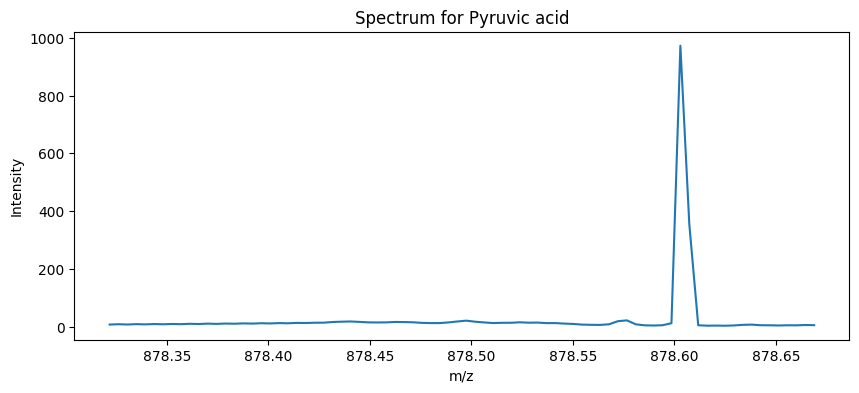

In [72]:
import matplotlib.pyplot as plt

compound = df1.loc[0]["Name"]

plt.figure(figsize=(10, 4))
plt.plot(mz, intensities)
plt.title(f"Spectrum for {compound}")
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.show()

In [74]:
plt.figure(figsize=(8, 3))
plt.hist(df1["mz_low"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of mz_low")
plt.xlabel("mz_low")
plt.ylabel("Frequency")
plt.show()

KeyError: 'mz_low'

<Figure size 800x300 with 0 Axes>